# Redwine

Namen - Studentennummer
* Quinn de Groot
* Kaai ter Horst
* Amaryllis Lee  - 1735290

### Casusopdracht
Voor deze casus moeten we een data science pipeline maken, waarbij we dataset redwine.csv analyseert. Het uitgangspunt van de analyse is een aantal onderzoeksvragen. Vervolgens doorloop je het data science proces van CRISP-DM en leg je de resultaten op een reproduceerbare manier vast in Jupyter Notebook.

### Onderzoeksvragen

Er zijn drie onderzoekesvragen beschreven, waar een verplecht is van de opdracht en 2 zelf bedacht zijn.Bovendien zijn er ook de eisen die we zullen toepassen voor elke ondezeoksvraag.

 1.	**In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?**
    1.	Toepassing van een supervised machine learning 
    2.	Correlatieonderzoek
    
2.	**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
    1.	Toepassing van een unsupervised machine learning
    2.	Gebruik van externe dataset
    
3.	**Wat is het verband tusen de ingredienten van de wijnen en de regio's?**
    1.	Interactieve visualisatie
    2.	Toepassing van supervised learning.


## Inhoud

1. Data Understanding
    - Data Collection 
    - Data exploration & analysis
2. Data Preparation
    - Data munging
    - Data cleaning
3. Data Analyses
    - Analyse oderzoeksvraag 1
    - Analyse onderzoeksvraag 2
    - Analyse onderzoeksvraag 3


## Data Understanding 

### Data Collection 
In de Data Collection zullen de libraries gaan importeren, de toegewezen datasets en de externe dataset gaan inlezenen bekijken.
De bron voor de externe dataset: https://www.kaggle.com/piyushgoyal443/red-wine-dataset

#### Libraries importeren 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Datasets inlezen en verkennen 

In [4]:
# load dataset redwine.csv
df = pd.read_csv('redwine.csv',encoding  = "cp1252", delimiter = ';')
# De attributen van de dataset  bekijken
df.describe()

,id,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,2465.000000,2465.000000,2196.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,1233.089655,88.811359,24.819217,8.352819,0.528162,2.562353,0.087485,15.804665,47.218661,3.311201,0.660353
std,711.869967,2.974000,25.539475,1.734847,0.178869,1.407030,0.047043,10.379218,33.187830,0.153927,0.172531
min,1.000000,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,617.000000,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,1233.000000,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,1849.000000,91.000000,28.000000,9.300000,0.635000,2.600000,0.091000,21.000000,64.000000,3.400000,0.730000
max,2466.000000,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


In [5]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Data exploration

Er zal in de data redwine.csv ( **df** ) de *features* word bekeken.Er wordt gezien of de *feautures* in de dataset compleet is en goed is voor het oplossen van de onderzoeksvragen 

In [6]:
# Dimensie bekijken van df 
df.shape 

(2465, 22)

In [7]:
# Return een lijst van de features in de dataset
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [8]:
# De datypes voor elke feature
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

In [9]:
#Bekijk de waardes van de features.
df['total sulfur dioxide'].min()

6.0


- Numerieke features:  
    - id
    - points 
    - price
    - fixed_acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - pH 
    - sulphates
    - alcohol
- Characters (string) Features
    - country                  # moet verwijdert worden, alle waarden = Portugal
    - description              
    - designation               
    - province                 
    - taster_name              
    - title                    
    - variety                  # moet verwijderd worden
    - winery                   
    
  

In [10]:
print(df['variety'].unique()) # Er is te zien dat alle wijnen zij Portuguese Red, dus dit kolom kunnen we verwijderen .
print(df['country'].unique()) # Er is te zien dat alle wijnen zij Portugal, dus dit kolom kunnen we verwijderen.

['Portuguese Red']
['Portugal']


Alle features die de datatype object heeft, moet de volgende datatypes hebben.
! : features die we gaan gebruiken om onderzoeksvragen op te lossen.
* country                  object 
* description              object 
* designation              object
* province                 object 
* taster_name              object 
* title                    object
* variety                  object  
* winery                   object  
* citric acid              object - float!
* density                  object - float!
* alcohol                  object - float!

In [11]:
df['citric acid'].head(10)

0      0.4
1     0.37
2     0.07
3     0.07
4     0.34
5     0.42
6     0.43
7     -   
8     0.41
9     0.07
Name: citric acid, dtype: object

In [12]:
# de datatypes van de nodige features veranderen 
# we gebruiken errors = 'coerce' om alle invalid parsing naar NaN te zetten.
df['citric acid'] = pd.to_numeric(df['citric acid'], errors = 'coerce')
df['density']     = pd.to_numeric(df['density'], errors = 'coerce')
df['alcohol']     = pd.to_numeric(df['alcohol'], errors = 'coerce')

In [13]:
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

#### Missend waardes
Er wordt bekeken of er missend waardes zijn in de kolommen. Verder wordt deze missend waardes verwerkt of verwijdert.

In [14]:
df.isnull().sum()

id                        0
country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid             203
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   1
pH                        0
sulphates                 0
alcohol                  10
dtype: int64

Aan de hand van de data exploration, kunnen we de volgende kolommen verwijderen:
* country : Deze kolom bevat alleen de waarde Portugal, we kunnen concluderen dat alle wijen komt van Portugal
* variety : Deze kolom bevat alleen de waarde Portuguese Red
* designation  en price: Deze kolommen zullen we niet gaan gebruiken om onze onderzoeksvragen op te lossen en ze  bevatten veel NaN waarden. 

In [15]:
#kolommen verwijderen 
df = df.drop(['country'], axis = 1)
df = df.drop(['variety'], axis = 1)
df = df.drop(['designation'], axis = 1)
df = df.drop(['price'], axis = 1)

### Data  analysis
*In deze sectie worden een analyse uitgevoerd op de dataset voor de onderzoeksvragen*
Hier worden gekeken naar de 

#### Analyse  onderzoeksvraag 3: 
In deze analyse gaan we de unieke aantal wijnen per regio bepalen. Hiermee kunnen we een steekproef nemen van de provincie die minstens een aantal wijnen bevatten.

In [16]:
#informatie halen van kolom 'province'
df['province'].describe() 

count      2465
unique       30
top       Douro
freq        880
Name: province, dtype: object

Uit de bovenstaande code kunnen we de onderstaande informatie uithalen:
* count : Er zijn 2456 regio's
* unique : Uit de 2456 regio's zijn er 30 unieke regio's
* top : Duoro's is de meeste voorkomende regio
* freq : De regio komt voor 880 keer in de kolom

In [17]:
#aantal wijnen per regio
wijnen_regios = df.groupby(df['province'].loc[df['points'] > 0]).count()['title']

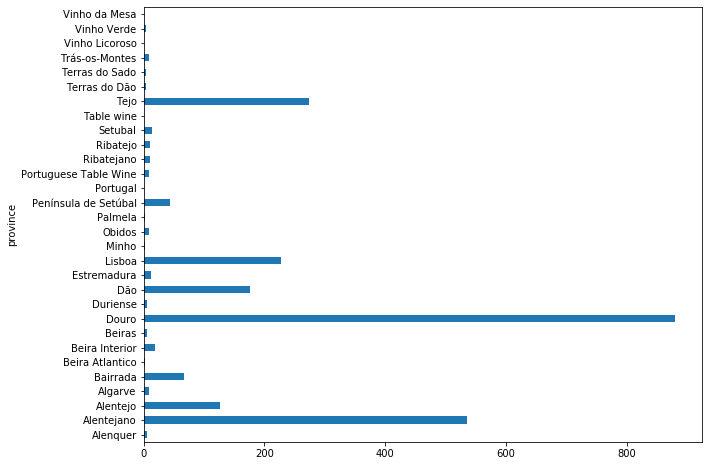

In [18]:

plt.figure(figsize = (10,8) )
wijnen_regios.plot(kind = 'barh', stacked = True)

In [19]:
# aantal unieke wijnen per regio bepalen
unieke_wijnen = list(df.groupby(df['province'].loc[df['points'] > 0]).count()['title'])
unieke_regios = [str(i) for i in df['province'].unique()] # zet alle unieke regio's in een lijst

In [20]:
 '''
    #visualiseer in een staaf diagram
bar_width = 0.25


plt.figure(figsize = (9,6), dpi=150)

#Data 
index = np.arange(len(df['province'].unique()))  # the label locations
plt.bar(index, unieke_wijnen, bar_width)

#Assen 
x.set_xlabel('Regio\'s in Portugal')
x.set_xticks(index + bar_width,unieke_regios)
x.set_xticklabel(df['province'], rotation = 50)
x.set_title('Aantal unieke wijnen per regio in Portugal')

#TODO : alle x cpprdinaten (regio's) in de grafiek laten tonen.

plt.show()
'''

"\n   #visualiseer in een staaf diagram\nbar_width = 0.25\n\n\nplt.figure(figsize = (9,6), dpi=150)\n\n#Data \nindex = np.arange(len(df['province'].unique()))  # the label locations\nplt.bar(index, unieke_wijnen, bar_width)\n\n#Assen \nx.set_xlabel('Regio's in Portugal')\nx.set_xticks(index + bar_width,unieke_regios)\nx.set_xticklabel(df['province'], rotation = 50)\nx.set_title('Aantal unieke wijnen per regio in Portugal')\n\n#TODO : alle x cpprdinaten (regio's) in de grafiek laten tonen.\n\nplt.show()\n"

Deze grafiek geeft de aantal unieke wijnen per regio. 
Elke bar geeft een provincie aan.
Hiermee kunnen we zien welke provincies kunnen  we nemne als selectie om onze onderzoeksvragen op te lossen.

Aan de hand van de grafieken, nemen we een selectie van alle regio's die meer dan 10 wijnen hebt.

# Onderzoeksvraag 2: Ama

**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
* Toepassing van een unsupervised machine learning
* Gebruik van externe dataset

Er zal voor deze onderzoeksvraag gebruik maken van clustering en de model k means.

1. Externe dataset
3. boxplot voor elke chemische samenstelling

In [21]:
df.shape

(2465, 18)

In [22]:
#load extenr dataset.
whiteWine = pd.read_csv('winequality-white.csv', delimiter = ';')
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
whiteWine['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [24]:
# verandert column name quality naar qualityscore om het makkelere te maken met het mergen van de twee datasets
whiteWine = whiteWine.rename(columns = {'quality':'qualityscore'})
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
whiteWine.shape # er zijn 4898 rijen en 12 kolommen 

(4898, 12)

In [26]:
whiteWine.isnull().sum() # er zijn geen missende waardes 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
qualityscore            0
dtype: int64

In [27]:
whiteWine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
qualityscore              int64
dtype: object

In [28]:
whiteWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Normaliseren** 

We gaan daarom de features normaliseren door middel van de z-score.
Z-score betkent dat we van een bepaalde normaalverdeling naar een standaard normaalverdeling gaat, waar de gemiddelde gelijk aan 0 is en de standaarddeviatie gelijk aan 1 is.

De z-score kunnen we berekenen:
𝑧𝑖= 𝑥𝑖− μ / 𝜎

    zi = z score
    x = waarde van kolom x
    μ = gemiddelde waarde van kolom x
    𝜎 = standaarddeviatie van kolom x

In [29]:
# whiteWine normaliseren 
whitenorm = pd.DataFrame()
for col in list(whiteWine.columns):
    whitenorm[col] = (whiteWine[col]-whiteWine[col].mean())/whiteWine[col].std()
whitenorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856


Bepaal wat de feature variabelen 
Doordat er wordt gebruik maken va unsupervised learning , dan weten dat er geen target variabel is.

In [30]:
#Voor deze dataset zullen we gaan kijken naar de chemische samenstelling van de wijnen 
redfeat = df.loc[:, 'fixed acidity':]
redfeat['qualityscore'] = df['points']
redfeat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,10.0,0.29,0.40,2.9,0.098,10.0,26.0,10.00600,3.48,0.91,9.7,87
1,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,91
2,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,90
3,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,90
4,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,92


In [31]:
redfeat.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
qualityscore              int64
dtype: object

In [32]:
# redWine dataset normaliseren 
rednorm = pd.DataFrame()
for col in list(redfeat.columns):
    rednorm[col] = (redfeat[col]-redfeat[col].mean())/redfeat[col].std()
rednorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,0.949468,-1.331489,0.542608,0.239972,0.223513,-0.559258,-0.639351,0.827454,1.096616,1.446967,-0.678378,-0.609065
1,-0.030446,-1.499210,0.380756,-0.826104,-0.244140,-0.751951,-0.729745,-0.126196,-0.332630,0.229796,-0.773452,0.735925
2,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
3,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
4,-0.203372,-0.269260,0.218904,-0.257530,-0.307911,0.018820,-0.669482,-0.126599,-0.202698,-0.002046,1.888630,1.072172


**Aan de hand van de bovenstaande output zien we dat de benodigde features (de chemische samenstellingen) zijn continue waardes.**

In [33]:
# Datasets samenvoegen
feat = pd.concat([rednorm, whitenorm], ignore_index =True)
feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,0.949468,-1.331489,0.542608,0.239972,0.223513,-0.559258,-0.639351,0.827454,1.096616,1.446967,-0.678378,-0.609065
1,-0.030446,-1.499210,0.380756,-0.826104,-0.244140,-0.751951,-0.729745,-0.126196,-0.332630,0.229796,-0.773452,0.735925
2,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
3,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
4,-0.203372,-0.269260,0.218904,-0.257530,-0.307911,0.018820,-0.669482,-0.126599,-0.202698,-0.002046,1.888630,1.072172


Boxplot tekenen van alle chemische samenstelling

Boxplotten tekenen van de chemische samenstellingen van de wijnen met een hoge score. 
Wijnen met hoge score beschouw ewe als de wijnen die een qualityscore boven  de gemiddelde.

In [34]:
qualityscore_gem = feat['qualityscore'].mean()
hogescore = feat[feat['qualityscore'] >qualityscore_gem]
len(hogescore) 

4475

In [43]:
hogescore.isnull().sum()


fixed acidity            0
volatile acidity         0
citric acid             93
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  1
pH                       0
sulphates                0
alcohol                  5
qualityscore             0
dtype: int64

In [50]:
hogescore = hogescore.fillna(0) # verandert alle NaN waardes naar 0

In [51]:
hogescore.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,-0.037271,-0.198172,0.036935,-0.051375,-0.125672,-0.018880,-0.155149,-0.152200,0.052295,0.080328,0.331097,0.647252
std,0.993635,0.898916,0.925227,0.985668,0.823798,0.907034,0.891282,0.939363,1.011362,1.022135,1.023553,0.657171
min,-3.619982,-2.281905,-2.761461,-1.181463,-1.604586,-1.899678,-2.832144,-2.312802,-3.101091,-2.364468,-1.636790,0.063430
25%,-0.722150,-0.851892,-0.530422,-0.826104,-0.499224,-0.664902,-0.790008,-0.744716,-0.650770,-0.612016,-0.499152,0.137856
50%,-0.145730,-0.280185,-0.117266,-0.294045,-0.222883,-0.135713,-0.307904,-0.126426,0.011479,-0.060006,0.313446,0.137856
75%,0.527585,0.315085,0.488658,0.336862,0.056190,0.511075,0.385121,0.191455,0.673728,0.614700,1.128035,1.266985
max,8.704217,6.813453,10.955302,11.712916,9.576526,5.414217,7.285241,15.029763,4.539801,7.474859,3.409820,3.762152


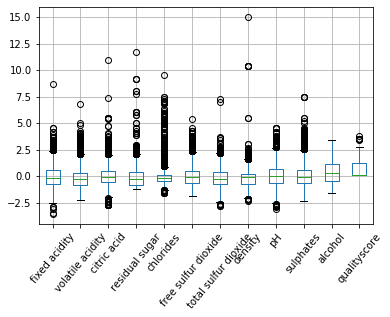

In [52]:
hogescore.boxplot(rot = 50)

Er is tez zien dat er veel outliers voorkomt in de features.


Aan de hand van de boxplotten zie we dat de waardes van de feautures zeer divers zijn en voor problemen kunnen zorgen wanneer we gaan weken met afstandsmaten.

### Model implementeren




In [53]:
#Model implementeren 
from sklearn.cluster import KMeans

In [54]:
# build the model with the output from elbow method which is 2
clusterNum = 2
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(hogescore)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


TypeError: '(slice(None, None, None), 9)' is an invalid key

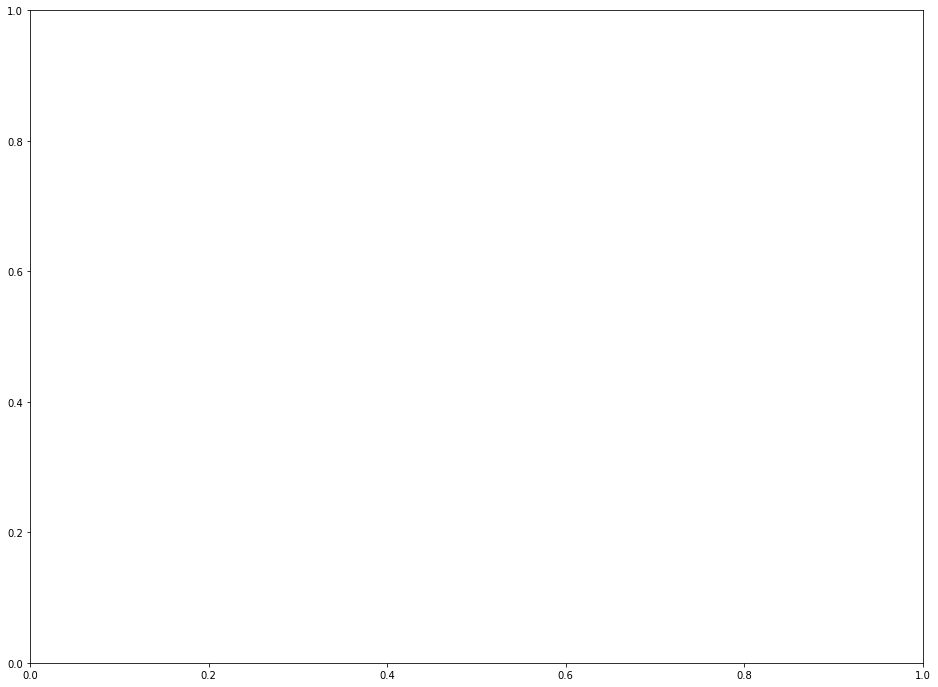

#### Analyse  onderzoeksvraag 1: 

In [ ]:
# Histogram plotten van de score van de Portugues Red

yb = list(df['points'])
plt.hist(yb,bins=len(yb))   
plt.show()

In [ ]:
#TODO : histogram plotten van de verdelingvan de score om outliers te zien 
#TODO : boxplotten , wat betekent None voor de oplssing van de onderzoeksvragen.
#TODO : de verschil van de gemiddelde ingredienten per provincie plotten ??